In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [49]:
#Mount drive for stored data access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#Load data from 'complete_data.xlsx' data set found in drive
dataset_path ='/content/drive/My Drive/Difficult Words Data/DHH Adult Data/'

data = pd.read_excel(dataset_path + 'complete_adult_data.xlsx')

In [51]:
#Display 15 random samples from the 'complete_data.xlsx' data set, ensure its the correct data
sampled_data = data.sample(n=15)
print(sampled_data)

                word  length  syllables  senses  synonyms  hyponyms  \
2451          cigars       6          2       1         1         6   
11300        removes       7          2       9        16       156   
11063        recipes       7          3       1         2         0   
5610       freelance       9          2       4         7         0   
11377     republican      10          4       5         2         0   
8320            marc       4          1       1         0         0   
13362       symptoms       8          2       2         1       105   
12015       searches       8          2       9         9        43   
1539        blogthis       8          3       0         0         0   
1175          banned       6          1       5         9         2   
14624           viva       4          2       1         4         0   
1893           burns       5          1      22        22        27   
9933       perceived       9          2       4         3        19   
983   

In [52]:
#Extract data features, dropping 'overall_label' and 'words'
X = data.drop(columns=['overall_label','word'])
#Extract target variable
y = data['overall_label']

#Split the data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
#Create MLP model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [54]:
#Compile MLP model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
#Train MLP model, epochs can be increased or decreased, however 10 seems sufficient
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

#Evaluate how accurate the MLP model is
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {test_loss:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')


Epoch 1/10
304/304 [==============================] - 2s 3ms/step - loss: 0.2984 - accuracy: 0.8908 - val_loss: 0.2528 - val_accuracy: 0.8963
Epoch 2/10
304/304 [==============================] - 1s 3ms/step - loss: 0.1964 - accuracy: 0.9245 - val_loss: 0.1606 - val_accuracy: 0.9378
Epoch 3/10
304/304 [==============================] - 1s 3ms/step - loss: 0.1422 - accuracy: 0.9417 - val_loss: 0.1378 - val_accuracy: 0.9403
Epoch 4/10
304/304 [==============================] - 1s 3ms/step - loss: 0.1220 - accuracy: 0.9508 - val_loss: 0.1280 - val_accuracy: 0.9473
Epoch 5/10
304/304 [==============================] - 1s 3ms/step - loss: 0.1154 - accuracy: 0.9518 - val_loss: 0.0981 - val_accuracy: 0.9601
Epoch 6/10
304/304 [==============================] - 1s 3ms/step - loss: 0.1067 - accuracy: 0.9573 - val_loss: 0.1098 - val_accuracy: 0.9576
Epoch 7/10
304/304 [==============================] - 1s 3ms/step - loss: 0.0956 - accuracy: 0.9603 - val_loss: 0.1394 - val_accuracy: 0.9473
Epoch 

In [56]:
#Import confusion matrix and roc libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

95/95 [==============================] - 0s 2ms/step


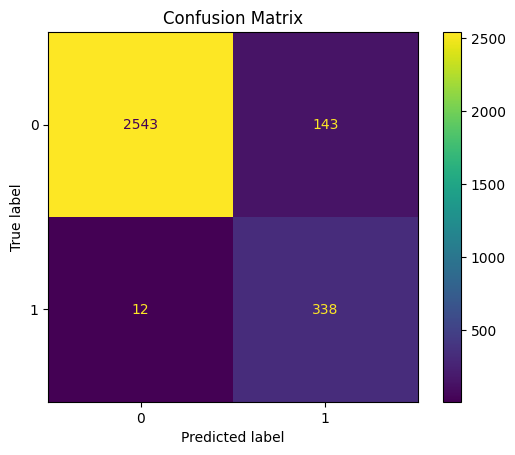

In [57]:
#Predict probabilities on previously trained model
y_pred = model.predict(X_test)

#Ensure binary predictions, from 0 to 1
y_pred_binary = (y_pred > 0.5)

#Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1']).plot()
plt.title('Confusion Matrix')
plt.show()

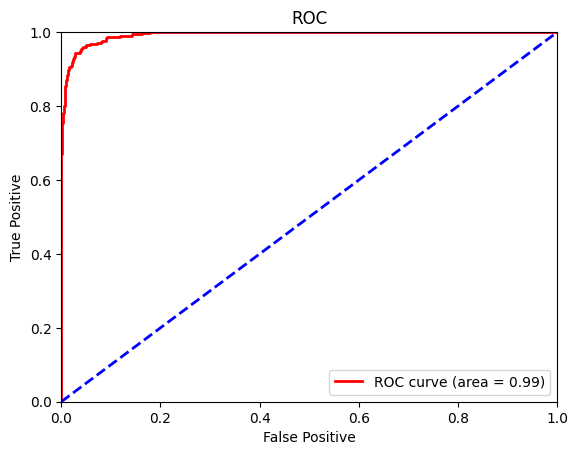

In [58]:
#Compute the roc curve and auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#Plot roc curve using false and true positives, color code each line
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--')

#Set x and y axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#Create labels for roc
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()